<h1>Introduction to classification</h1>

In this notebook we will be using the wine quality dataset (available at [kaggle](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset)) to explore how machine learning can be used to infer the quality of a wine based on its attributes.

So, first let us explore our dataset using pandas and matplotlib.

In [1]:
# Importing the holy trinity of data science.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# getting seaborn online to give our graphics a kick.
import seaborn as sns
sns.set()

In [2]:
# Loading the dataset.
wine_df = pd.read_csv("WineQT.csv")
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
wine_df.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

Question: in the context of our problem, what are the independent variables and what is the dependent variable? (or, what is even all of this?)

Exercise: how could you check which variables seem better correlated with the independent variable?

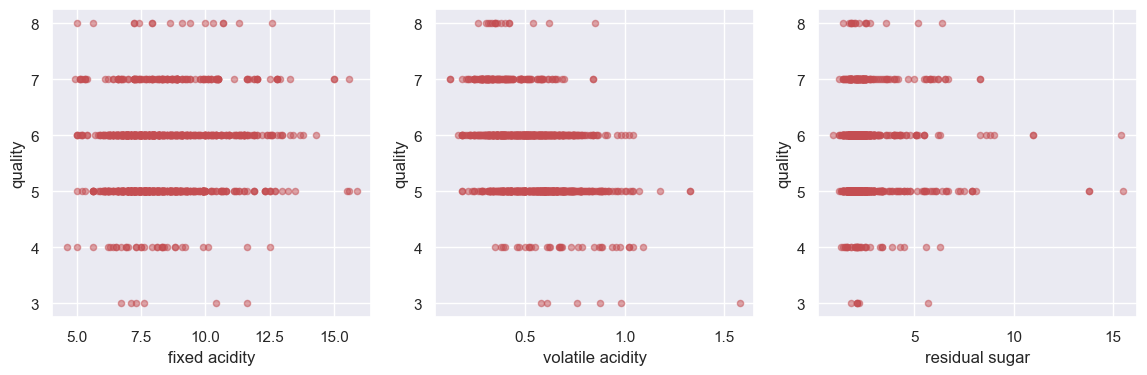

In [4]:
# Scattering
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,4))

for xcol, ax in zip(['fixed acidity', 'volatile acidity', 'residual sugar'], axes):
    wine_df.plot(kind='scatter', x=xcol, y='quality', ax=ax, alpha=0.5, color='r')

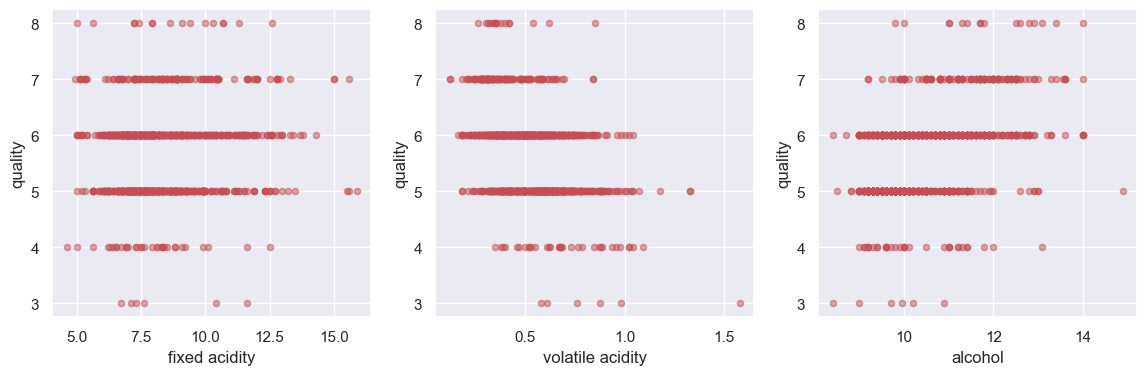

In [3]:
# Scattering
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,4))

for xcol, ax in zip(['fixed acidity', 'volatile acidity', 'alcohol'], axes):
    wine_df.plot(kind='scatter', x=xcol, y='quality', ax=ax, alpha=0.5, color='r')

<AxesSubplot:>

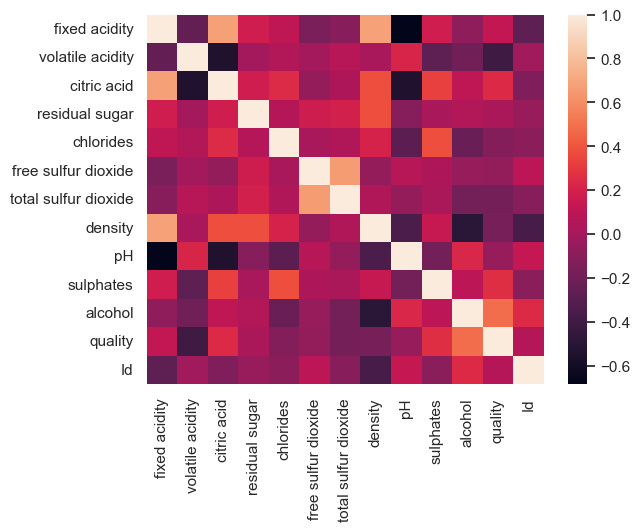

In [4]:
corr = wine_df.corr()
sns.heatmap(corr)

Exercise: What would you consider a wine with high acidity content?

In [5]:
wine_df["fixed acidity"].describe()

count    1143.000000
mean        8.311111
std         1.747595
min         4.600000
25%         7.100000
50%         7.900000
75%         9.100000
max        15.900000
Name: fixed acidity, dtype: float64

Exercise: How many rows of missing data do we have? What should we do about them?

In [5]:
wine_df.isnull().values.any()

False

Exercise: are there any columns that we can assume are irrelevant for this exercise? are there any....potentially dangerous columns out there?

In [7]:
wine_df = wine_df.drop(['Id'], axis=1)

In [9]:
wine_df.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Exercise: Check if you have [scikit-learn](https://scikit-learn.org/stable/install.html) installed and install it if you don't.

In [10]:
import sklearn

Now we will encode the quality column to labels.

In [11]:
wine_df.quality.value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [12]:
wine_df.quality.describe()

count    1143.000000
mean        5.657043
std         0.805824
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [13]:
def WineSnob(x):
    if x<=4:
        return('Nope')
    elif x<7:
        return('Ok')
    elif x>=7:
        return('More')

In [14]:
wine_df.quality.apply(lambda x: WineSnob(x))

0       Ok
1       Ok
2       Ok
3       Ok
4       Ok
        ..
1138    Ok
1139    Ok
1140    Ok
1141    Ok
1142    Ok
Name: quality, Length: 1143, dtype: object

In [15]:
wine_df['quality_str'] = wine_df.quality.apply(lambda x: WineSnob(x))

In [16]:
wine_df['quality_str'].value_counts()

Ok      945
More    159
Nope     39
Name: quality_str, dtype: int64

Question: how to we handle non-numerical variables? What steps can we take to ensure the machine can make sense of it?

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [19]:
le.fit_transform(wine_df['quality_str'])

array([2, 2, 2, ..., 2, 2, 2])

In [20]:
wine_df['quality_enc'] = le.fit_transform(wine_df['quality_str'])

In [21]:
wine_df['quality_str'].value_counts()

Ok      945
More    159
Nope     39
Name: quality_str, dtype: int64

In [22]:
wine_df['quality_enc'].value_counts()

2    945
0    159
1     39
Name: quality_enc, dtype: int64

Question: in this specific case was all of this largely unecessary?

Now how can we use this data to make predictions? What are the steps involved?

<h1>Splitting the dataset</h1>

We will first split the dataset into a training set and a test set. But why would we do this on the first place?

In [23]:
# Notice that I will slightly change how I import libraries for now on to be more specific.
from sklearn.model_selection import train_test_split

In [29]:
# Separating the train and test.
train, test = train_test_split(wine_df, random_state=42) #train_size=0.25

In [25]:
len(wine_df)

1143

In [26]:
print(len(train))

857


In [27]:
len(train)/len(wine_df)

0.7497812773403325

In [30]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_str,quality_enc
970,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8,5,Ok,2
72,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5,Ok,2
665,10.1,0.430,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.0,7,More,0
584,12.9,0.500,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6,Ok,2
649,8.4,0.360,0.32,2.2,0.081,32.0,79.0,0.99640,3.30,0.72,11.0,6,Ok,2


In [31]:
print(len(test))

286


In [32]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_str,quality_enc
158,6.8,0.61,0.04,1.5,0.057,5.0,10.0,0.99525,3.42,0.60,9.500000,5,Ok,2
1081,6.9,0.84,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333,6,Ok,2
291,7.0,0.58,0.12,1.9,0.091,34.0,124.0,0.99560,3.44,0.48,10.500000,5,Ok,2
538,7.8,0.48,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.100000,6,Ok,2
367,12.5,0.60,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,11.900000,6,Ok,2


Exercise: Check the train_test_split [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and try to figure out how to change the proportion of train and test set.

In [ ]:
#train, test = train_test_split(wine_df, train_size=0.25, random_state=42)

Question: what proportion of train and test set should we use? Would it make a difference?

Question: if you and your colleagues run the same line of code to separate the datasets, should you always find the same results?

After my incredibly interesting and engaging monologue about randomness we will separate our dependent and independent variables.

In [33]:
X_train = train.drop(['quality','quality_str','quality_enc'], axis=1)
Y_train = train['quality_enc']

In [34]:
X_test = test.drop(['quality','quality_str','quality_enc'], axis=1)
Y_test = test['quality_enc']

<h1>Feature scalling</h1>

It is a common practice in machine learning to scale features. We will check how to do this process on the next few lines.

In [35]:
from sklearn.preprocessing import StandardScaler

In [37]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

Exercise: print the first 5 rows of one of the objects defined above!

In [38]:
X_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [39]:
X_train

array([[-0.56552689,  1.17619836, -0.96062722, ..., -0.48090146,
        -0.93688673, -0.59111872],
       [-0.09521486,  0.25470504, -0.24278931, ..., -0.15193231,
        -0.87710178, -1.1537867 ],
       [ 1.08056522, -0.55509212,  0.68014513, ..., -0.61248913,
        -0.09989738, -0.40356272],
       ...,
       [-0.50673789, -1.00187676,  0.32122618, ...,  0.3086245 ,
        -0.33903719,  1.37821923],
       [-0.21279287,  0.226781  ,  0.21867791, ..., -0.15193231,
         0.19902739, -0.87245271],
       [-0.44794889, -0.0524594 ,  0.68014513, ..., -0.3493138 ,
        -0.09989738,  1.28444123]])

Should we feature scale Y?

In [40]:
Y_train = StandardScaler().fit_transform(Y_train)
Y_test = StandardScaler().fit_transform(Y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[2. 2. 0. 2. 2. 2. 0. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 1. 2. 0. 2. 2. 2.
 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 0.
 2. 1. 0. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 0. 2. 2. 2. 2. 0. 2. 2. 2.
 0. 2. 2. 2. 0. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 2. 1. 2. 2.
 0. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 1. 2. 2. 2.
 2. 2. 2. 2. 0. 2. 2. 0. 0. 2. 2. 1. 1. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 0. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 0. 1. 2. 2. 2. 2. 2. 2.
 2. 1. 2. 2. 2. 0. 2. 2. 2. 2. 0. 0. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 0. 2. 0. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2.
 0. 2. 2. 2. 2. 2. 0. 0. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 0. 2. 2. 2. 1. 1. 2. 2. 0. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 0. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 1. 2. 2. 2. 2. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 0. 2.
 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 0. 1. 2. 0. 2. 2. 2. 2. 2. 0. 0. 2. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 1. 2. 2. 2. 2. 2. 2. 0. 2. 2. 0. 0. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 0. 2. 2. 2. 2. 0. 2. 2. 2. 2. 1. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 0. 2. 0. 1. 2. 2. 0. 1. 2. 2. 2.
 2. 2. 2. 0. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 0. 2. 0. 2. 2.
 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 0. 2. 2. 0. 2. 0. 2. 2. 2. 0. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2.
 2. 2. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 0. 2. 2. 2. 0. 2. 2. 2.
 2. 2. 2. 2. 0. 1. 2. 0. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 0. 2. 0. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 0. 2. 0. 2. 2. 2. 0. 2. 2. 2. 2. 2. 0. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 1. 2. 0. 2. 2. 0. 2. 2. 2. 0. 2. 2. 2. 0. 2. 2. 2. 2. 2.
 0. 2. 0. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 0. 0.
 2. 2. 2. 2. 2. 2. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 2. 1. 2. 2. 2. 2.
 0. 2. 1. 0. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 0. 2. 0. 2. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 0. 0. 0. 2. 0. 2.
 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [41]:
Y_train_nope = Y_train.to_numpy()

In [45]:
Y_train.to_numpy()

array([2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 1,
       1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,

In [42]:
Y_train_nope.reshape(-1,1)

array([[2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [2],
       [1],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
    

In [43]:
Y_train_nope = StandardScaler().fit_transform(Y_train_nope.reshape(-1,1))

In [44]:
Y_train_nope

array([[ 0.45407022],
       [ 0.45407022],
       [-2.36577164],
       [ 0.45407022],
       [ 0.45407022],
       [ 0.45407022],
       [-2.36577164],
       [ 0.45407022],
       [ 0.45407022],
       [ 0.45407022],
       [-2.36577164],
       [ 0.45407022],
       [ 0.45407022],
       [ 0.45407022],
       [ 0.45407022],
       [ 0.45407022],
       [ 0.45407022],
       [ 0.45407022],
       [-0.95585071],
       [ 0.45407022],
       [-2.36577164],
       [ 0.45407022],
       [ 0.45407022],
       [ 0.45407022],
       [ 0.45407022],
       [-2.36577164],
       [ 0.45407022],
       [ 0.45407022],
       [ 0.45407022],
       [ 0.45407022],
       [ 0.45407022],
       [ 0.45407022],
       [ 0.45407022],
       [ 0.45407022],
       [ 0.45407022],
       [ 0.45407022],
       [ 0.45407022],
       [ 0.45407022],
       [ 0.45407022],
       [ 0.45407022],
       [-2.36577164],
       [ 0.45407022],
       [ 0.45407022],
       [ 0.45407022],
       [ 0.45407022],
       [ 0

But really....what do we stand to gain doing all this? Will the model still run later on if you don't apply feature scalling?

In [70]:
# Loading the dataset.
wine_df = pd.read_csv("WineQT.csv")

# Separating the train and test.
train, test = train_test_split(wine_df, random_state=42)

X_train = train.drop(['quality','Id'], axis=1)
Y_train = train['quality']
X_test = test.drop(['quality','Id'], axis=1)
Y_test = test['quality']

# Scalling.
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

<h1>The decision tree classifier</h1>
In the next few blocks we will be exploring the use of 

[decision trees](https://scikit-learn.org/stable/modules/tree.html) to classify our data.

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
# Initializing the model.
DTR = DecisionTreeClassifier(random_state=42)

# fit and batch of predictions.
DTR.fit(X_train,Y_train)
Y_pred = DTR.predict(X_test)

Exercise: how can you visually check how good the performance was?

In [49]:
Y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2])

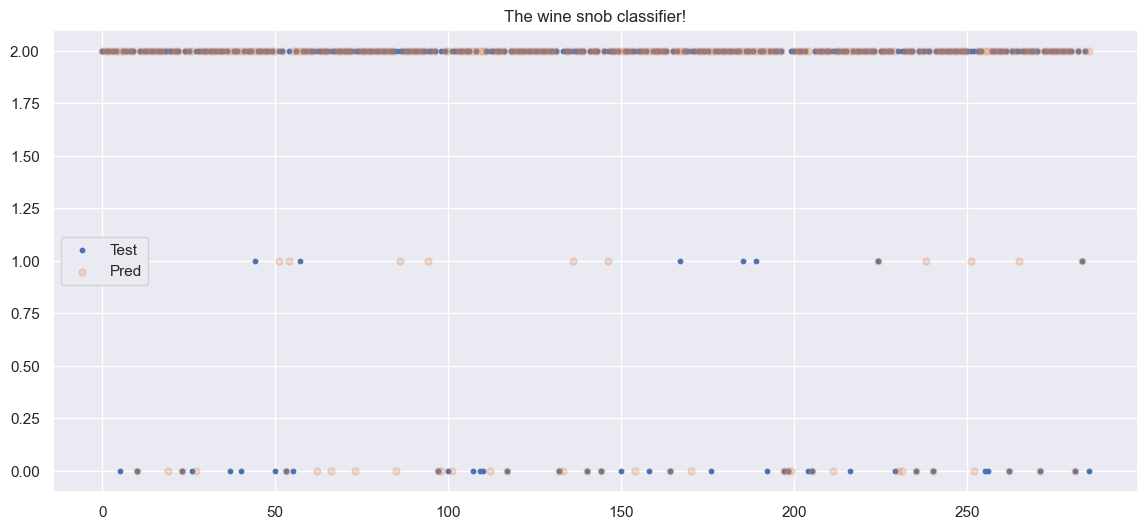

In [52]:
fig, ax = plt.subplots(1,1,figsize=(14,6))
x_axis = np.arange(0,len(Y_pred))

ax.scatter(x_axis,Y_test, s=10, label='Test')
ax.scatter(x_axis,Y_pred, s=25, label='Pred', alpha=0.25)

ax.set_title(f'The wine snob classifier!')

ax.legend()

<h1>Measuring accuracy</h1>
There are many metrics that can be used to measure the accuracy of a model. 
Over the next few blocks we will see how to use both the

[mean absolut error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) and [mean squared error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).

In [53]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [54]:
ys_mae = mean_absolute_error(Y_test,Y_pred)
ys_mse = mean_squared_error(Y_test,Y_pred)

In [55]:
print(f"MAE {ys_mae}, MSE {ys_mse}")

MAE 0.3076923076923077, MSE 0.5664335664335665


Exercise: check the [DTC] documentation and run the model for a different depth.

In [64]:
# Initializing the model.
DTR = DecisionTreeClassifier(max_depth = 15, random_state=42)

# Systolic fit and batch of predictions.
DTR.fit(X_train,Y_train)
Y_pred = DTR.predict(X_test)

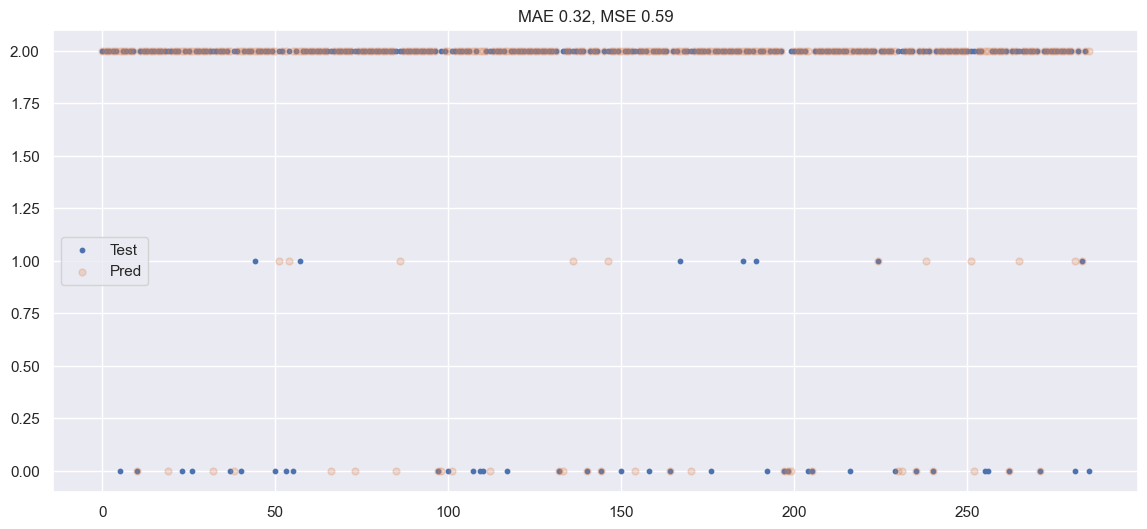

In [65]:
ys_mae = mean_absolute_error(Y_test,Y_pred)
ys_mse = mean_squared_error(Y_test,Y_pred)

fig, ax = plt.subplots(1,1,figsize=(14,6))
x_axis = np.arange(0,len(Y_pred))

ax.scatter(x_axis,Y_test, s=10, label='Test')
ax.scatter(x_axis,Y_pred, s=25, label='Pred', alpha=0.25)

ax.set_title(f"MAE {ys_mae:.2f}, MSE {ys_mse:.2f}")

ax.legend()

Question: If the results depend on the parameters we set, how could you determine the optimum number of parameters? Exercise: do it!

In [66]:
results = []
for i in range(1,100):
    # Initializing the model.
    DTR = DecisionTreeClassifier(max_depth=i, 
                                 random_state=42)

    # Systolic fit and batch of predictions.
    DTR.fit(X_train,Y_train)
    Y_pred = DTR.predict(X_test)

    ys_mae = mean_absolute_error(Y_test,Y_pred)

    results.append(ys_mae)


In [67]:
min(results)

0.22727272727272727

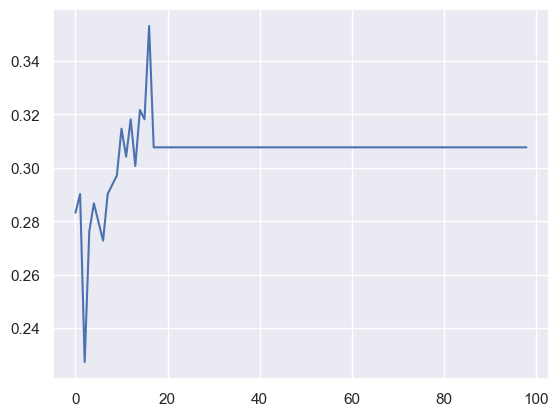

In [68]:
plt.plot(results)

<h1>The randon forest regressor</h1>
The implementation of the random forest classifier is quite similar to what has previously seen although the rationale of how they work bear some significant differences. Details can be found in the 

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
# Creating the classifier object.
RFR = RandomForestClassifier(n_estimators=10,
                             max_depth=50, 
                             random_state=42)

# Fitting the train dataset.
RFR.fit(X_train,Y_train)

# Creating the predictions.
Y_pred = RFR.predict(X_test)

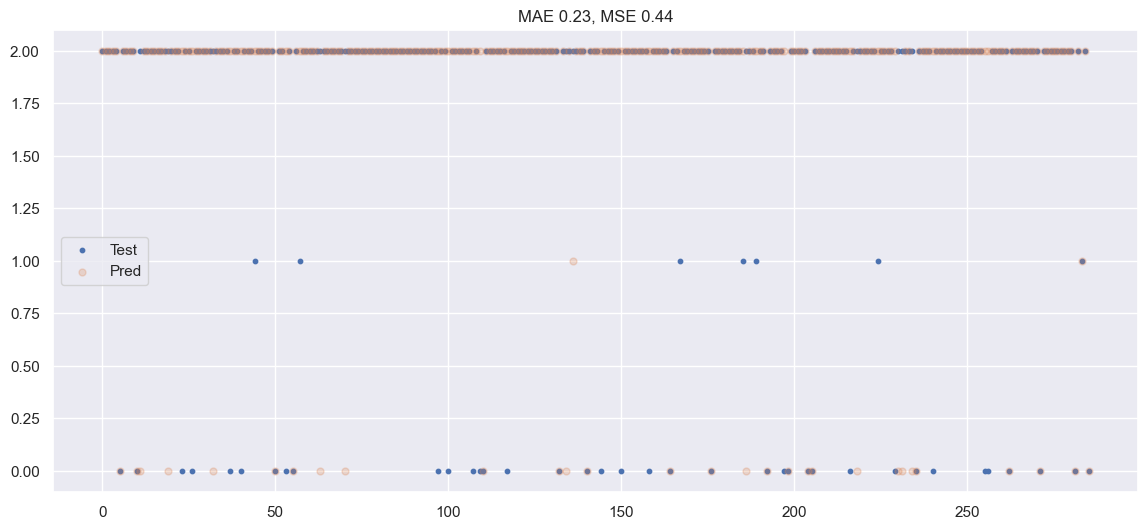

In [76]:
ys_mae = mean_absolute_error(Y_test,Y_pred)
ys_mse = mean_squared_error(Y_test,Y_pred)

fig, ax = plt.subplots(1,1,figsize=(14,6))
x_axis = np.arange(0,len(Y_pred))

ax.scatter(x_axis,Y_test, s=10, label='Test')
ax.scatter(x_axis,Y_pred, s=25, label='Pred', alpha=0.25)

ax.set_title(f"MAE {ys_mae:.2f}, MSE {ys_mse:.2f}")

ax.legend()

Exercise: The accuracy obtained is currently dreadful. Improve on that!

In [77]:
results = []
for i in range(1,100):
    # Creating the classifier object.
    RFR = RandomForestClassifier(n_estimators=i,
                                 max_depth=10, 
                                 random_state=42)

    # Fitting the train dataset.
    RFR.fit(X_train,Y_train)

    # Creating the predictions.
    Y_pred = RFR.predict(X_test)

    # Calculate error
    ys_mae = mean_absolute_error(Y_test,Y_pred)
    
    # Appending to the list.
    results.append(ys_mae)
    
print(min(results))

0.2062937062937063


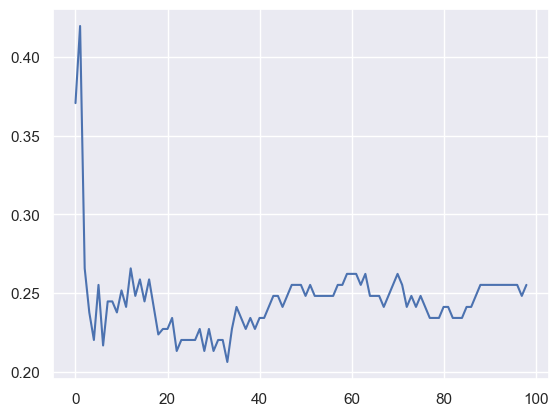

In [78]:
plt.plot(results)

In [79]:
index_min = min(range(len(results)), key=results.__getitem__)

In [82]:
results[33]

0.2062937062937063

In [81]:
index_min

33

<h1>Support Vector Machines</h1>

The last technique we will see today are the Support Vector Machines (or SVMs for short).

[Documentation](https://scikit-learn.org/stable/modules/svm.html)

In [89]:
from sklearn import svm

In [90]:
# Initializing the model.
SVC = svm.SVC(kernel='linear', degree=1)

# Fit and batch of predictions.
SVC.fit(X_train,Y_train)

# Creating the predictions.
Y_pred = SVC.predict(X_test)

ValueError: Found input variables with inconsistent numbers of samples: [914, 857]

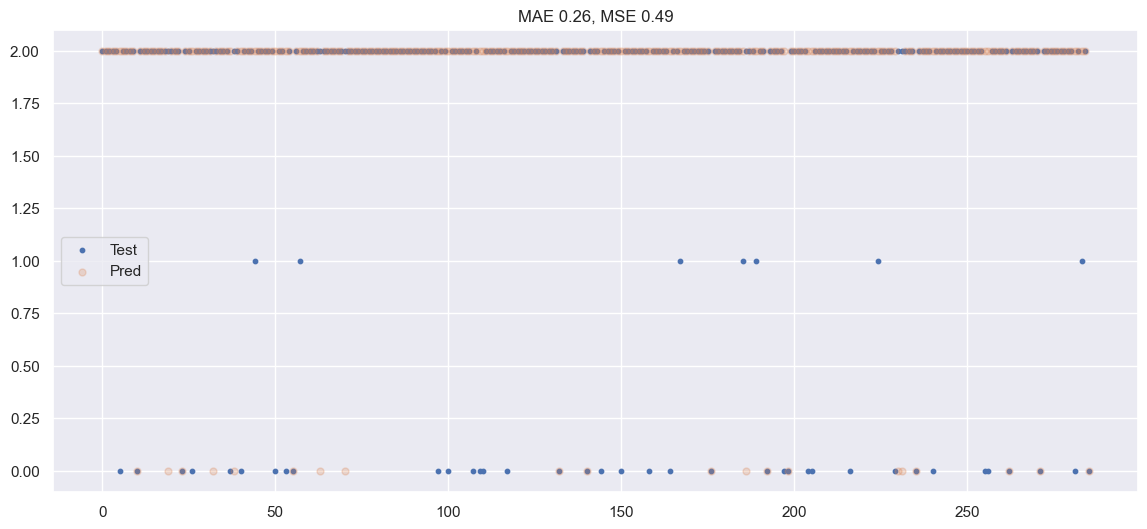

In [91]:
ys_mae = mean_absolute_error(Y_test,Y_pred)
ys_mse = mean_squared_error(Y_test,Y_pred)

fig, ax = plt.subplots(1,1,figsize=(14,6))
x_axis = np.arange(0,len(Y_pred))

ax.scatter(x_axis,Y_test, s=10, label='Test')
ax.scatter(x_axis,Y_pred, s=25, label='Pred', alpha=0.25)

ax.set_title(f"MAE {ys_mae:.2f}, MSE {ys_mse:.2f}")

ax.legend()

Exercise: improve the accuracy.

<h1>Pipelining</h1>

Hint: check this [post](https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976)

In [85]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [86]:
# Re loading the dataset.
wine_df = pd.read_csv("WineQT.csv")
wine_df.head()

# Separating independent and dependent variables.
X = wine_df.drop(['quality','Id'], axis=1)
Y = wine_df['quality']

In [87]:
# Splitting.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=Y)

In [92]:
# Defining the pipeline.
steps = [('scaler', StandardScaler()), ('SVM', svm.SVC())]
pipeline = Pipeline(steps)

In [93]:
parameteres = {'SVM__C':[0.001,0.1,10,100,10e5], 'SVM__gamma':[0.1,0.01]}

In [94]:
# defining the gridsearch.
grid = GridSearchCV(pipeline, 
                    param_grid=parameteres, 
                    cv=5)

In [95]:
grid.fit(X_train, y_train)
print("score = %3.2f" %(grid.score(X_test,y_test)))
print(grid.best_params_)

score = 0.63
{'SVM__C': 10, 'SVM__gamma': 0.1}


Exercise: re-run the model without applying feature scalling!